<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/dataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Analysing how many people survived during titanic incident by comparing each other attributes in the dataset. Before building any ML Model data should be fine tuned (preProcessed)

# **Reading the dataset**

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')

Getting the entries using head, usually it splits out first 5 entries, value can also be specified head(50)

In [ ]:
titanic_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Getting the entries using tail, literally tail splits out last 5 entries

In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Getting the no of rows and columns using shape

In [ ]:
titanic_data.shape

(891, 12)

Using info retriving more information about the dataset, usually info() displays a quick overview of data and it shows the datatypes and non null values

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


There is some null values in the data especially in age and cabin. So with the help of isnull().sum, null values can be identified. If null occured it describes as true and not null means false

In [ ]:
titanic_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  Fals

# **Handling Missing Values**

Since Cabin attribute is not needed to predict the survival, drop the Cabin col.

In [ ]:
titanic_data = titanic_data.drop(columns = 'Cabin',axis = 1)

Fill the null values in the attribute Age with mean


In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

Displaying the Embarked field

In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


Since Embarked field contains null values, fill null values with mode()

In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

Checking the Embarked field

In [ ]:
titanic_data['Embarked'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool>

# **Data Analysis**

describe() will generate the following statistical values like count, mean, std, min, max, firstquartile, median, thirdquartile

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# **Data Visualization**

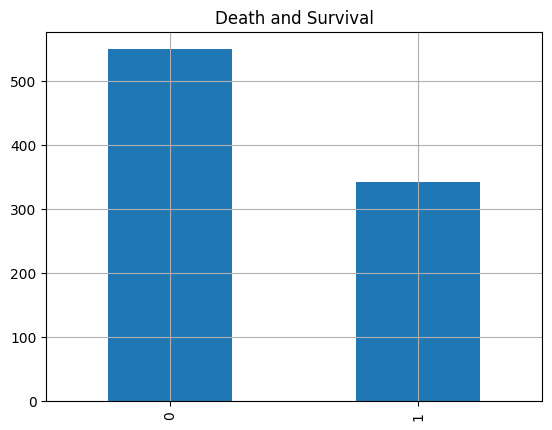

In [ ]:
titanic_data['Survived'].value_counts().plot(kind="bar",title="Death and Survival",grid=True)
plt.show()

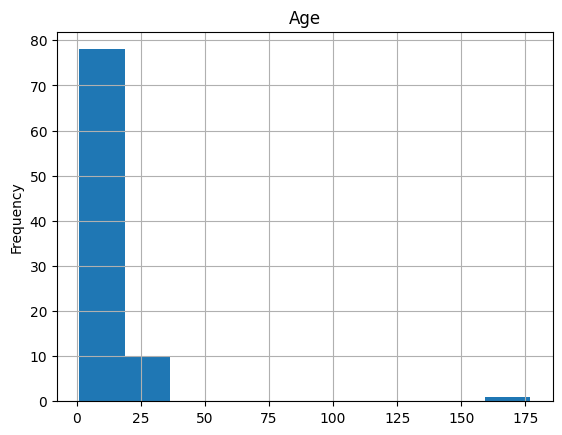

In [ ]:
titanic_data['Age'].value_counts().plot(kind='hist',grid=True,title="Age")
plt.show()

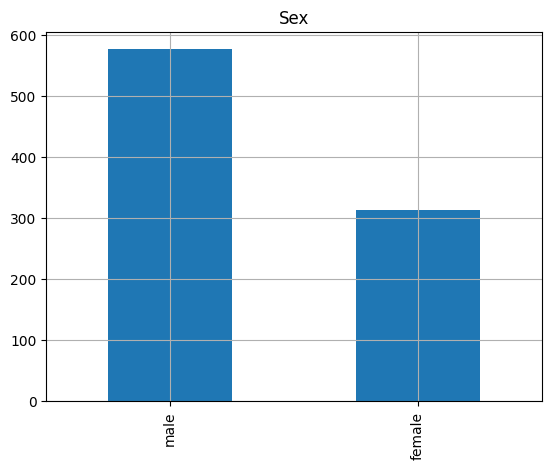

In [ ]:
titanic_data['Sex'].value_counts().plot(kind="bar",title="Sex",grid=True)
plt.show()

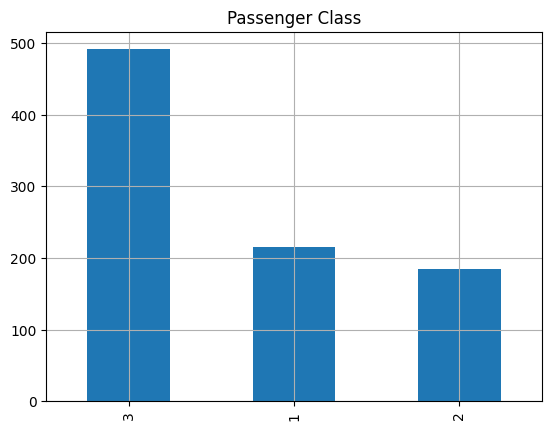

In [ ]:
titanic_data['Pclass'].value_counts().plot(kind="bar",grid="True",title="Passenger Class")
plt.show()

Implementation of crosstab, it tells the relationship between two categorical variables

In [ ]:
relation = pd.crosstab(titanic_data['Pclass'],titanic_data['Survived'])
print(relation)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


So it's concluded that 3rd passenger class people has affected the most

# **Encoding the categorical columns**

Categorical columns needed to be converted into numerical data, most machine learning models input numerical data. So convertion is must

In [ ]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_data.replace({'Sex':{'male': 0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
titanic_data.head(20)

NameError: ignored

In [ ]:
titanic_data.pivot_table(index='Age',columns='Pclass',values='Survived')
# print(x)
# sns.heatmap(x,linewidths=0.5,annot=True)

In [ ]:
titanic_data['Age'] = titanic_data['Age'].astype(int)

NameError: ignored

Chi Square to predict the survival


In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in titanic_data.columns:
  le=LabelEncoder()
  titanic_data[col]=le.fit_transform(titanic_data[col])

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,52,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,48,1,0,49,189,2
4,4,0,2,15,1,48,0,0,472,43,2


In [ ]:
from sklearn.feature_selection import chi2
X = titanic_data.drop(columns=['Survived'])
Y = titanic_data['Survived']

In [ ]:
chi_scores = chi2(X,Y)

In [ ]:
print(chi_scores)

(array([3.32037886e+00, 5.44658660e+01, 4.35568915e+02, 9.27024470e+01,
       2.47103837e+01, 1.23604038e+00, 1.00974991e+01, 2.87165547e+03,
       4.62696372e+03, 1.02025247e+01]), array([6.84260587e-02, 1.58171493e-13, 9.97314604e-97, 6.07783826e-22,
       6.66242541e-07, 2.66235537e-01, 1.48470676e-03, 0.00000000e+00,
       0.00000000e+00, 1.40248517e-03]))


<Axes: >

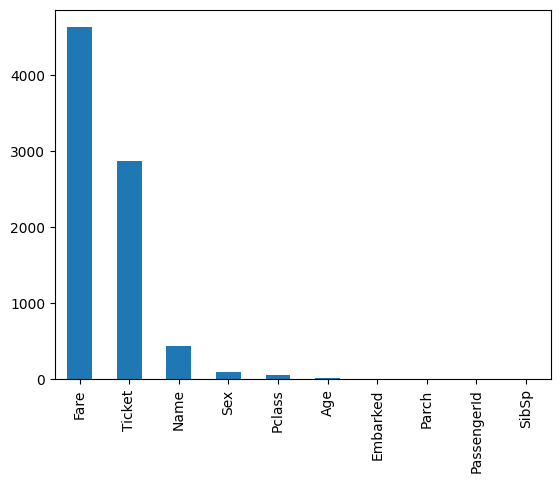

In [ ]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

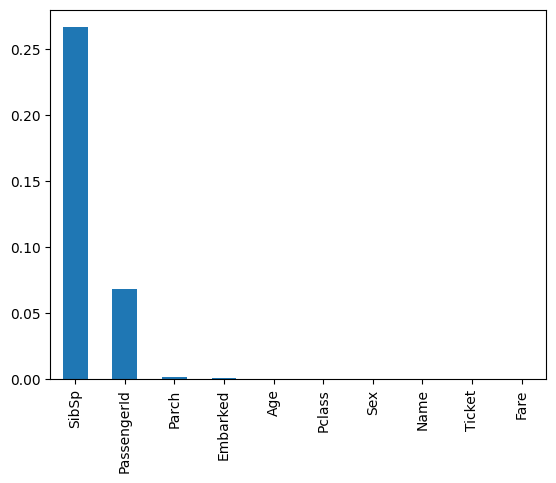

In [ ]:
chi_values=pd.Series(chi_scores[1],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()